In [3]:
import sys
sys.path.insert(0, '/mnt/c/Users/jiyun/Desktop/Jiyu/2020-2021/Winter/CSC413 - Neural Networks and Deep Learnin/Final Project/Image-Captioning-Reproduction/nearest-neighbor')
from feature_extraction import ImageFeature
from caption_generation import CaptionGenerator

In [4]:
dataDir = '../annotations/annotations_trainval2014'
dataType = 'val2014'
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)

In [5]:
annFile

'../annotations/annotations_trainval2014/annotations/captions_val2014.json'

In [6]:
capgen = CaptionGenerator(annFile, early_stop=200)

loading annotations into memory...


  0%|          | 0/40504 [00:00<?, ?it/s]

Done (t=0.30s)
creating index...
index created!
Using early stop at 200 images


  0%|          | 199/40504 [01:31<5:09:07,  2.17it/s]


In [8]:
k = 10
nearest_neighbors = capgen.get_kneighbors(k=k)

In [9]:
import matplotlib.pyplot as plt
import requests
from PIL import Image

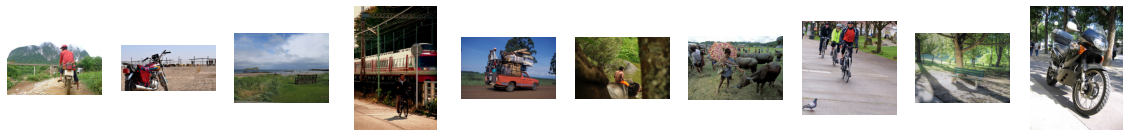

In [11]:
columns = 10
plt.figure(figsize=(20, 5))
for i, img_id in enumerate(nearest_neighbors[0]):
    url = capgen.coco.imgs[img_id]['coco_url']
    raw_img = Image.open(requests.get(url, stream=True).raw)

    plt.subplot(int(len(nearest_neighbors[0]) / columns + 1), columns, i + 1)
    plt.axis('off')
    plt.imshow(raw_img)
plt.savefig("10_closest.png")

In [14]:
nearest_neighbors[0]

array([391895, 354533, 522713, 483108, 372938, 384553, 184613, 515289,
        14869, 271177])

In [21]:
annIds = capgen.coco.getAnnIds(imgIds=nearest_neighbors[0])

In [47]:
annIds = [annIds[i:i + 5] for i in range(0, len(annIds), 5)]

In [49]:
annIds

[[770337, 771687, 772707, 776154, 781998],
 [518562, 521853, 523791, 527163, 527385],
 [532355, 533834, 534485, 536693, 537158],
 [580656, 581820, 583905, 584211, 590199],
 [204125, 235481, 239612, 245762, 245939],
 [618785, 619145, 619772, 620027, 620894],
 [474921, 479322, 479334, 481560, 483594],
 [100740, 104601, 107163, 111711, 112842],
 [152691, 191730, 200187, 209157, 211791],
 [772796, 772988, 774524, 774602, 777038]]

In [53]:
cap_one = [capgen.coco.anns[i]['caption'].split() for i in annIds[1]]
cap_two = [capgen.coco.anns[i]['caption'].split() for i in annIds[2]]

In [54]:
cap_one

[['A',
  'motorcycle',
  'sits',
  'parked',
  'across',
  'from',
  'a',
  'herd',
  'of',
  'livestock.'],
 ['A', 'motorbike,', 'people', 'and', 'sheep', 'in', 'the', 'background'],
 ['A', 'motorcycle', 'parked', 'on', 'top', 'of', 'a', 'sandy', 'beach.'],
 ['A',
  'motorcycle',
  'in',
  'the',
  'foreground',
  'parked',
  'in',
  'a',
  'dirt',
  'parking',
  'lot'],
 ['A',
  'multicolored',
  'motorcycle',
  'rests',
  'outside',
  'of',
  'a',
  'sheep',
  'farm.']]

In [26]:
from nltk.translate import bleu_score

In [57]:
cap_two[0]

['a',
 'bench',
 'sitting',
 'in',
 'the',
 'grass',
 'facing',
 'the',
 'water',
 'and',
 'boats']

In [59]:
bleu_score.sentence_bleu(cap_one, cap_two[0])

6.513869329968086e-155